In [1]:
import numpy as np
import matplotlib.pyplot as plt


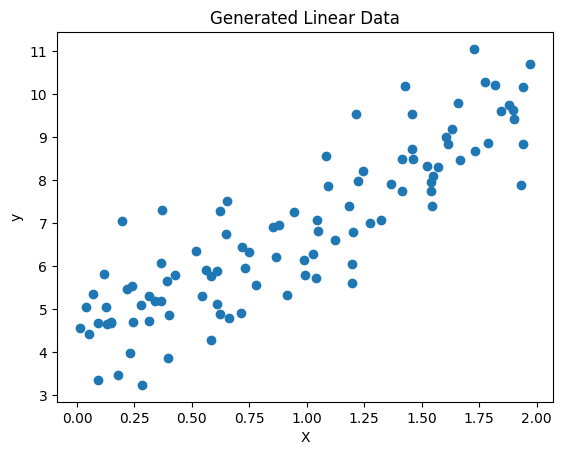

In [2]:
# Generate synthetic linear data: y = 3x + 4 + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Linear Data")
plt.show()


In [3]:
# Add x0 = 1 for bias term
X_b = np.c_[np.ones((100, 1)), X]  # Add bias column


In [4]:
# Gradient Descent Implementation
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)

theta = np.random.randn(2, 1)  # Random initial weights

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

print("Learned Parameters:", theta)


Learned Parameters: [[4.21509616]
 [2.77011339]]


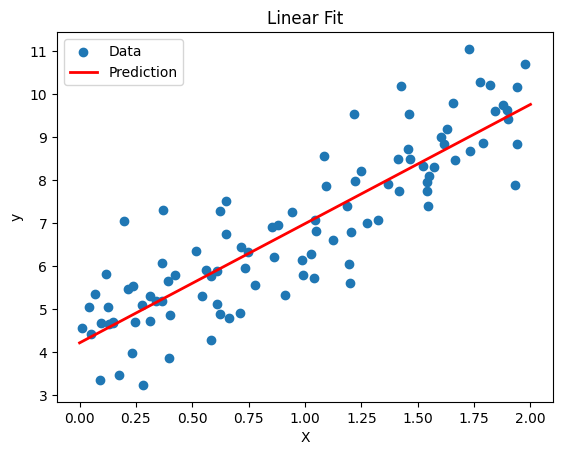

In [5]:
# Plot predictions
plt.scatter(X, y, label="Data")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Fit")
plt.show()


In [6]:

from sklearn.metrics import mean_squared_error, r2_score

y_pred_all = X_b.dot(theta)
mse = mean_squared_error(y, y_pred_all)
r2 = r2_score(y, y_pred_all)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")
from sklearn.metrics import mean_squared_error, r2_score

y_pred_all = X_b.dot(theta)
mse = mean_squared_error(y, y_pred_all)
r2 = r2_score(y, y_pred_all)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error: 0.807
R² Score: 0.769
Mean Squared Error: 0.807
R² Score: 0.769


In [7]:
class LinearRegressionScratch:
    def __init__(self, lr=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.theta = np.random.randn(2, 1)
        m = len(X_b)
        for _ in range(self.n_iters):
            gradients = 2/m * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.lr * gradients

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta)


In [8]:
model = LinearRegressionScratch()
model.fit(X, y)
preds = model.predict(X)

print("R² Score:", r2_score(y, preds))


R² Score: 0.7692735413614225
